# Part I

Kaggle: https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network/overview \

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

## Load dataset into the DataFrame

In [4]:
df = pd.read_csv('train.csv')

### Check the types

In [5]:
df.dtypes

Choice                   int64
A_follower_count         int64
A_following_count        int64
A_listed_count           int64
A_mentions_received    float64
A_retweets_received    float64
A_mentions_sent        float64
A_retweets_sent        float64
A_posts                float64
A_network_feature_1      int64
A_network_feature_2    float64
A_network_feature_3    float64
B_follower_count         int64
B_following_count        int64
B_listed_count           int64
B_mentions_received    float64
B_retweets_received    float64
B_mentions_sent        float64
B_retweets_sent        float64
B_posts                float64
B_network_feature_1      int64
B_network_feature_2    float64
B_network_feature_3    float64
dtype: object

### Check the dimensions

In [6]:
df.shape

(5500, 23)

### Check the column names

In [7]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

## Data Exploration

### Provide descriptive statistics

In [8]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


## Dealing with missing values

### Check missing values

In [9]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [10]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Data duplicates

In [11]:
df.duplicated().sum()

132

In [12]:
df = df.drop_duplicates()
df.shape

(5368, 23)

## Target

### Check distinct values in choice

In [13]:
df['Choice'].unique()

array([0, 1])

## Data Exploration

### Histograms

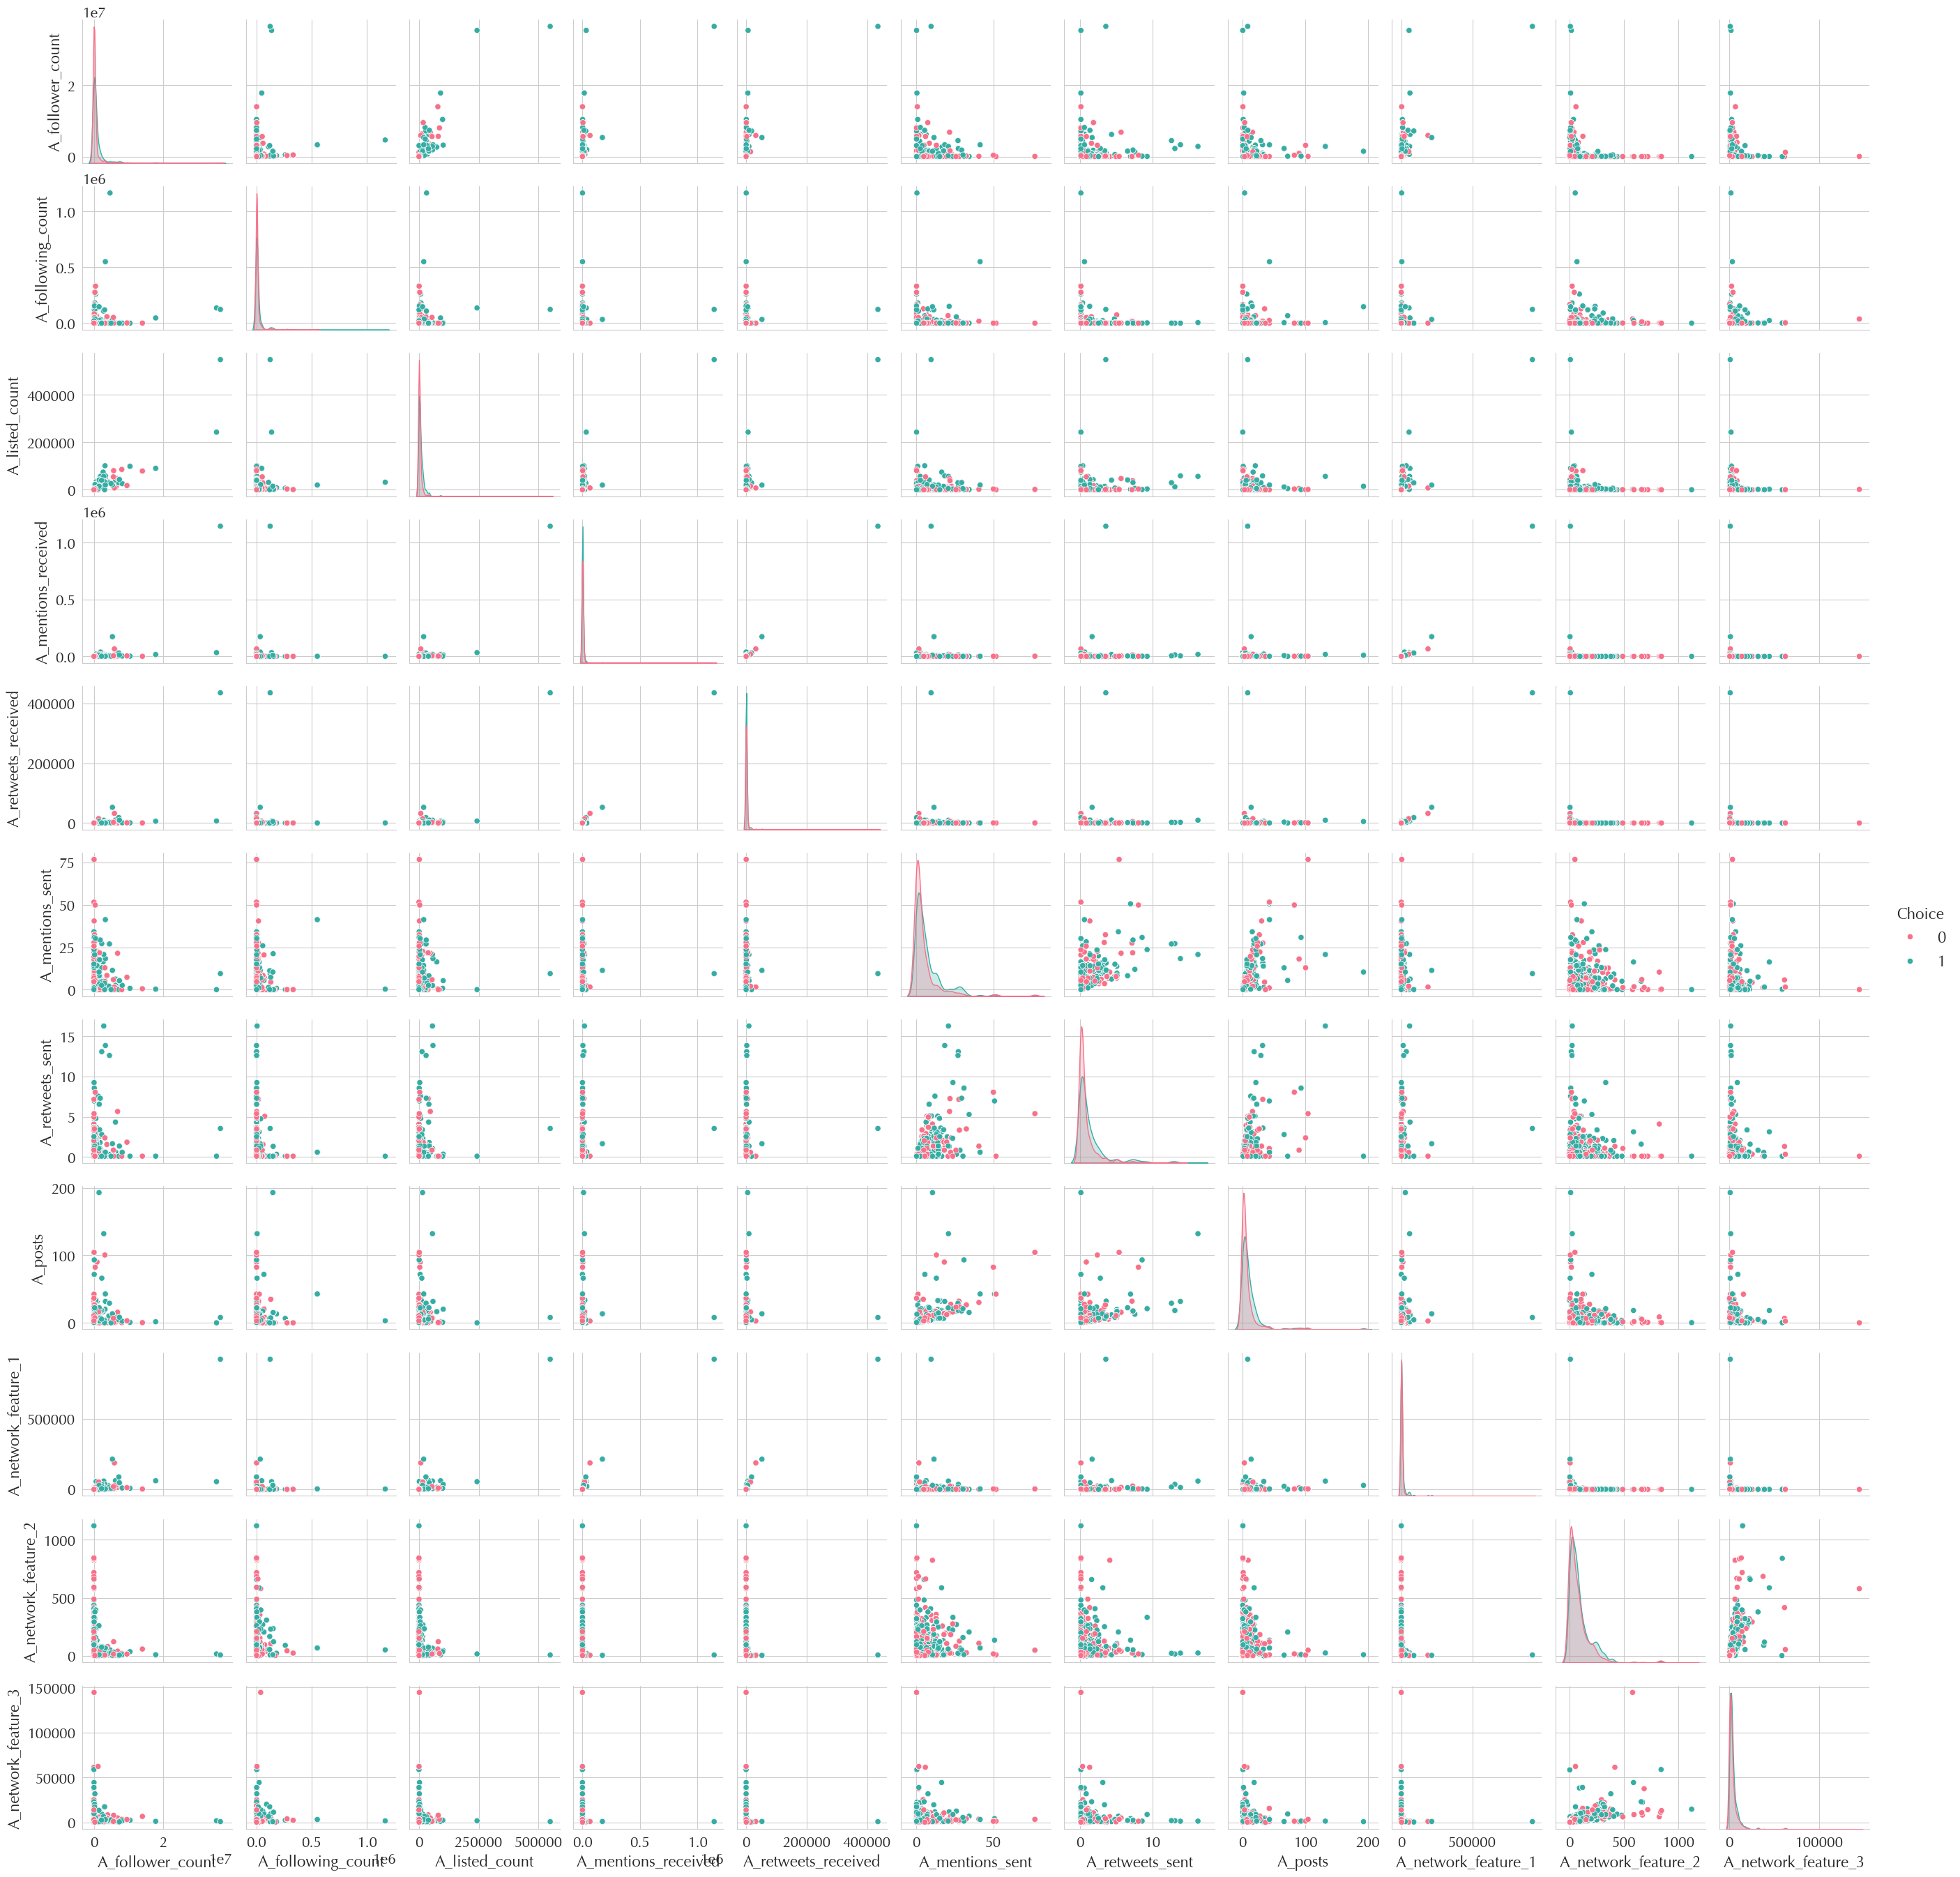

In [14]:
# Plot pair plot
sns.pairplot(df.iloc[:,:12], hue="Choice", palette="husl")

In [15]:
# Count the number of zeroes in each column
(df == 0).sum()

Choice                 2632
A_follower_count          0
A_following_count        34
A_listed_count           59
A_mentions_received       0
A_retweets_received       0
A_mentions_sent           0
A_retweets_sent           0
A_posts                   0
A_network_feature_1     203
A_network_feature_2     332
A_network_feature_3     251
B_follower_count          0
B_following_count        32
B_listed_count           45
B_mentions_received       0
B_retweets_received       0
B_mentions_sent           0
B_retweets_sent           0
B_posts                   0
B_network_feature_1     190
B_network_feature_2     331
B_network_feature_3     240
dtype: int64

## Transformation of features
Perhaps a transformation of (A / B) or (A – B) variables will be better than using A and B variables separately. This may also be easier to interpret

### A / B

In [16]:
ab_following_count = df['A_follower_count'] / df['B_follower_count']
ab_listed_count = df['A_listed_count'] / df['B_listed_count']
ab_mentions_received = df['A_mentions_received'] / df['B_mentions_received']
ab_retweets_received = df['A_retweets_received'] / df['B_retweets_received']
ab_mentions_sent = df['A_mentions_sent'] / df['B_mentions_sent']
ab_retweets_sent = df['A_retweets_sent'] / df['B_retweets_sent']
ab_posts = df['A_posts'] / df['B_posts']
ab_network_feature_1 = df['A_network_feature_1'] / df['B_network_feature_1']
ab_network_feature_2 = df['A_network_feature_2'] / df['B_network_feature_2']
ab_network_feature_3 = df['A_network_feature_3'] / df['B_network_feature_3']

### Correlations

In [17]:
divide_features = {
    'choice': df['Choice'],
    'ab_following_count': ab_following_count, 
    'ab_listed_count': ab_listed_count, 
    'ab_mentions_received': ab_mentions_received,
    'ab_retweets_received': ab_retweets_received, 
    'ab_mentions_sent': ab_mentions_sent, 
    'ab_retweets_sent': ab_retweets_sent, 
    'ab_posts': ab_posts,
    'ab_network_feature_1': ab_network_feature_1, 
    'ab_network_feature_2': ab_network_feature_2, 
    'ab_network_feature_3': ab_network_feature_3
}

# Convert dictionary to DataFrame
divide_df = pd.DataFrame(divide_features)

# Calculate correlation matrix
divide_corr = divide_df.corr()

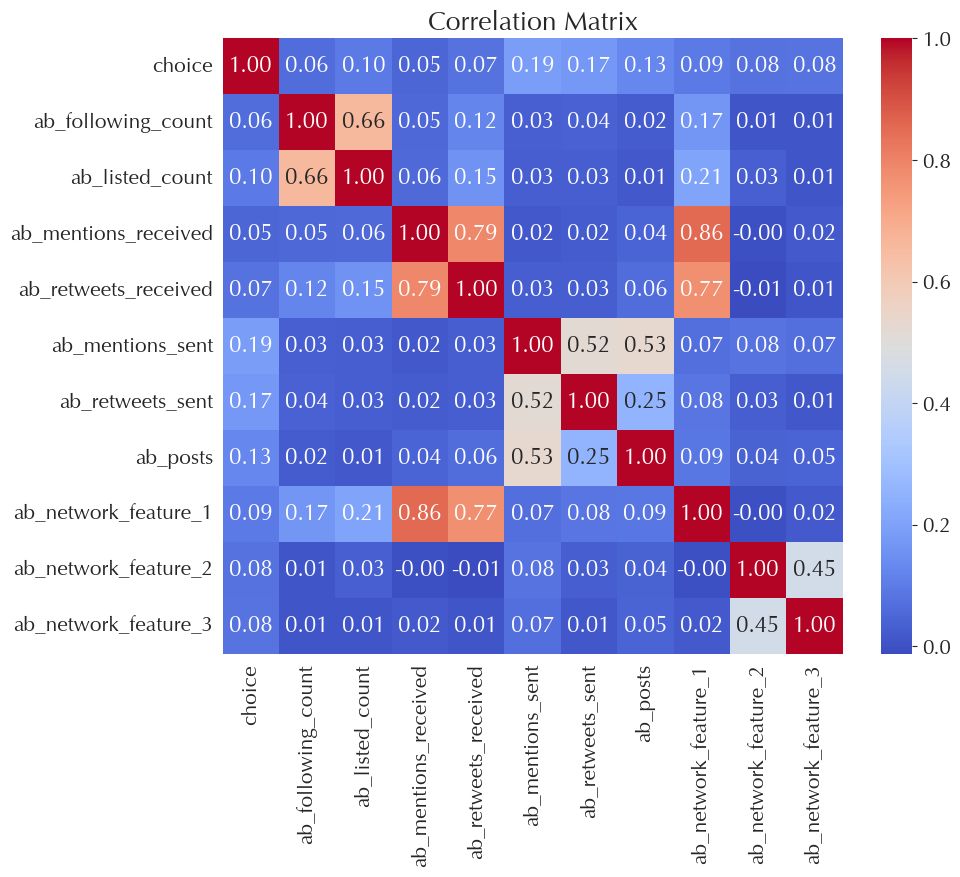

In [18]:
# Print correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(divide_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

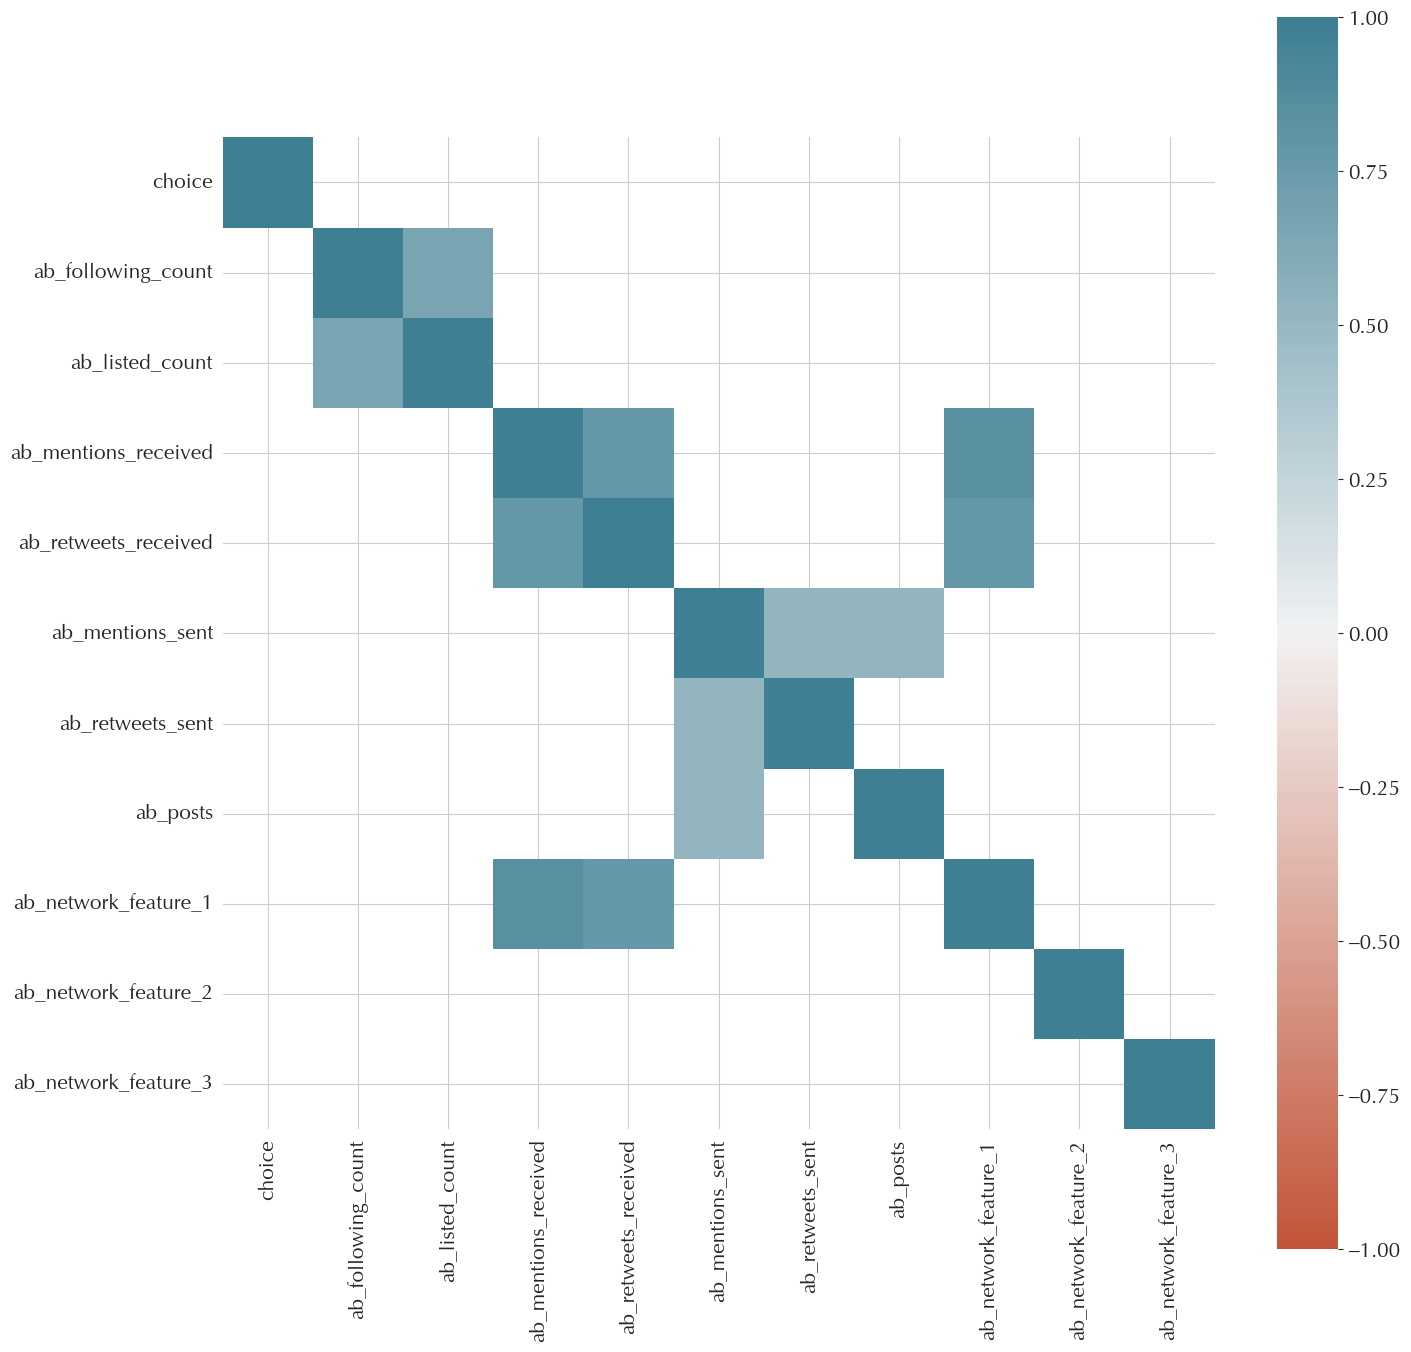

In [19]:
high_corr_divide = divide_corr[abs(divide_corr) > 0.5]
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    high_corr_divide,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [20]:
# Print the highly correlated pairs
high_corr_divide = high_corr_divide.unstack().sort_values()
high_corr_divide = high_corr_divide[high_corr_divide != 1]
high_corr_divide = high_corr_divide[abs(high_corr_divide) > 0.5]
print(high_corr_divide)

ab_mentions_sent      ab_retweets_sent        0.519548
ab_retweets_sent      ab_mentions_sent        0.519548
ab_posts              ab_mentions_sent        0.530188
ab_mentions_sent      ab_posts                0.530188
ab_following_count    ab_listed_count         0.657314
ab_listed_count       ab_following_count      0.657314
ab_network_feature_1  ab_retweets_received    0.773917
ab_retweets_received  ab_network_feature_1    0.773917
ab_mentions_received  ab_retweets_received    0.786722
ab_retweets_received  ab_mentions_received    0.786722
ab_network_feature_1  ab_mentions_received    0.856932
ab_mentions_received  ab_network_feature_1    0.856932
dtype: float64


In [21]:
# Keep only unique pairs
unique_high_corr_divide = high_corr_divide[::2]
print(unique_high_corr_divide)

ab_mentions_sent      ab_retweets_sent        0.519548
ab_posts              ab_mentions_sent        0.530188
ab_following_count    ab_listed_count         0.657314
ab_network_feature_1  ab_retweets_received    0.773917
ab_mentions_received  ab_retweets_received    0.786722
ab_network_feature_1  ab_mentions_received    0.856932
dtype: float64


### VIF

In [22]:
def calculate_vif(data):
    # Handling or removing infinite values
    data = data.replace([np.inf, -np.inf], np.nan)
    
    # Dropping columns or rows with NaN values (choose one approach)
    # Approach 1: Drop any rows with NaN values
    # clean_data = data.dropna()
    
    # Approach 2: Fill NaN values with the mean (or median, zero, etc.)
    clean_data = data.fillna(data.mean())
    
    # Ensure we only process numeric data
    numeric_data = clean_data.select_dtypes(include=[np.number])
    
    # Initialize DataFrame to store VIF scores
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_data.columns
    
    # Calculate VIF for each numeric feature
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i)
                       for i in range(len(numeric_data.columns))]
    return vif_data

In [23]:
vif_scores_divide = calculate_vif(divide_df)
print(vif_scores_divide)

                 feature       VIF
0                 choice  1.273775
1     ab_following_count  1.662965
2        ab_listed_count  1.712119
3   ab_mentions_received  3.188450
4   ab_retweets_received  4.333702
5       ab_mentions_sent  1.999496
6       ab_retweets_sent  1.586257
7               ab_posts  1.467672
8   ab_network_feature_1  1.756117
9   ab_network_feature_2  1.063822
10  ab_network_feature_3  1.041453


### A - B

In [24]:
a_b_following_count = df['A_follower_count'] - df['B_follower_count']
a_b_listed_count = df['A_listed_count'] - df['B_listed_count']
a_b_mentions_received = df['A_mentions_received'] - df['B_mentions_received']
a_b_retweets_received = df['A_retweets_received'] - df['B_retweets_received']
a_b_mentions_sent = df['A_mentions_sent'] - df['B_mentions_sent']
a_b_retweets_sent = df['A_retweets_sent'] - df['B_retweets_sent']
a_b_posts = df['A_posts'] - df['B_posts']
a_b_network_feature_1 = df['A_network_feature_1'] - df['B_network_feature_1']
a_b_network_feature_2 = df['A_network_feature_2'] - df['B_network_feature_2']
a_b_network_feature_3 = df['A_network_feature_3'] - df['B_network_feature_3']

### Correlations

In [25]:
minus_features = {
    'choice': df['Choice'],
    'a_b_following_count': a_b_following_count, 
    'a_b_listed_count': ab_listed_count, 
    'a_b_mentions_received': a_b_mentions_received,
    'a_b_retweets_received': a_b_retweets_received, 
    'a_b_mentions_sent': a_b_mentions_sent, 
    'a_b_retweets_sent': a_b_retweets_sent, 
    'a_b_posts': a_b_posts,
    'a_b_network_feature_1': a_b_network_feature_1, 
    'a_b_network_feature_2': a_b_network_feature_2, 
    'a_b_network_feature_3': a_b_network_feature_3
}

# Convert dictionary to DataFrame
minus_df = pd.DataFrame(minus_features)

# Calculate correlations
minus_corr = minus_df.corr()

In [26]:
# Print minus_df
minus_df.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_retweets_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_1,a_b_network_feature_2,a_b_network_feature_3
0,0,-34235,0.001776,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,0.141615,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,0.490291,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,0.007194,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,14.591160,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


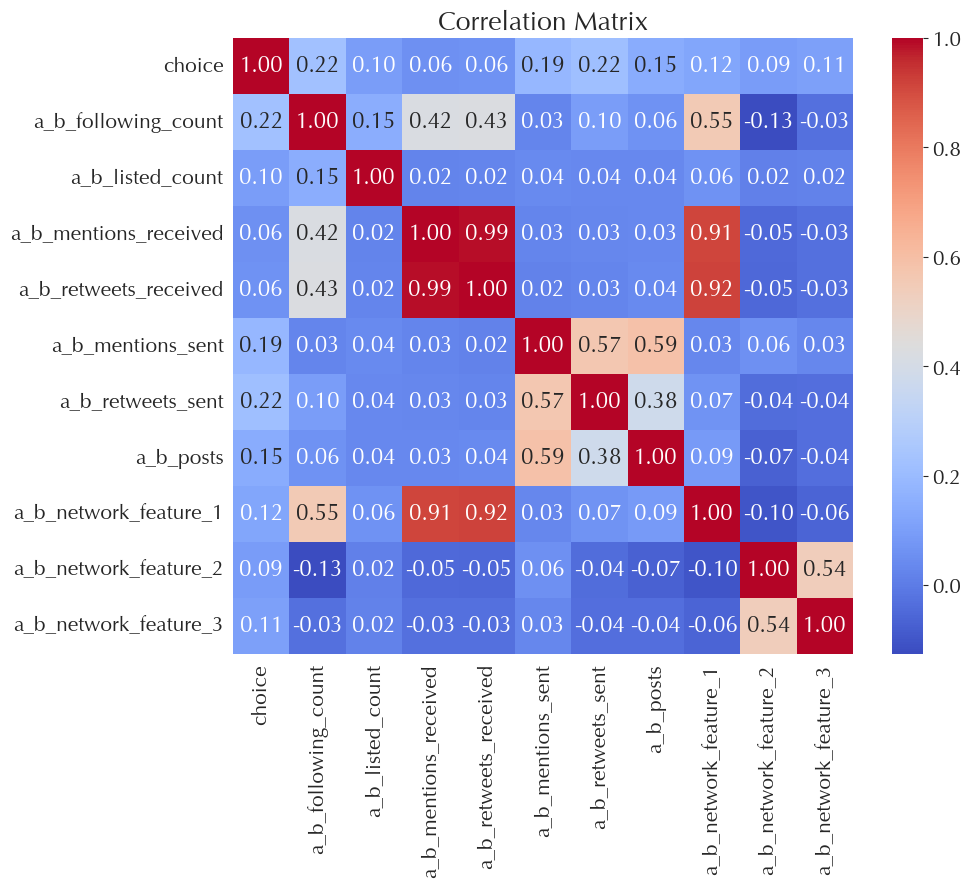

In [27]:
# Print correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(minus_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

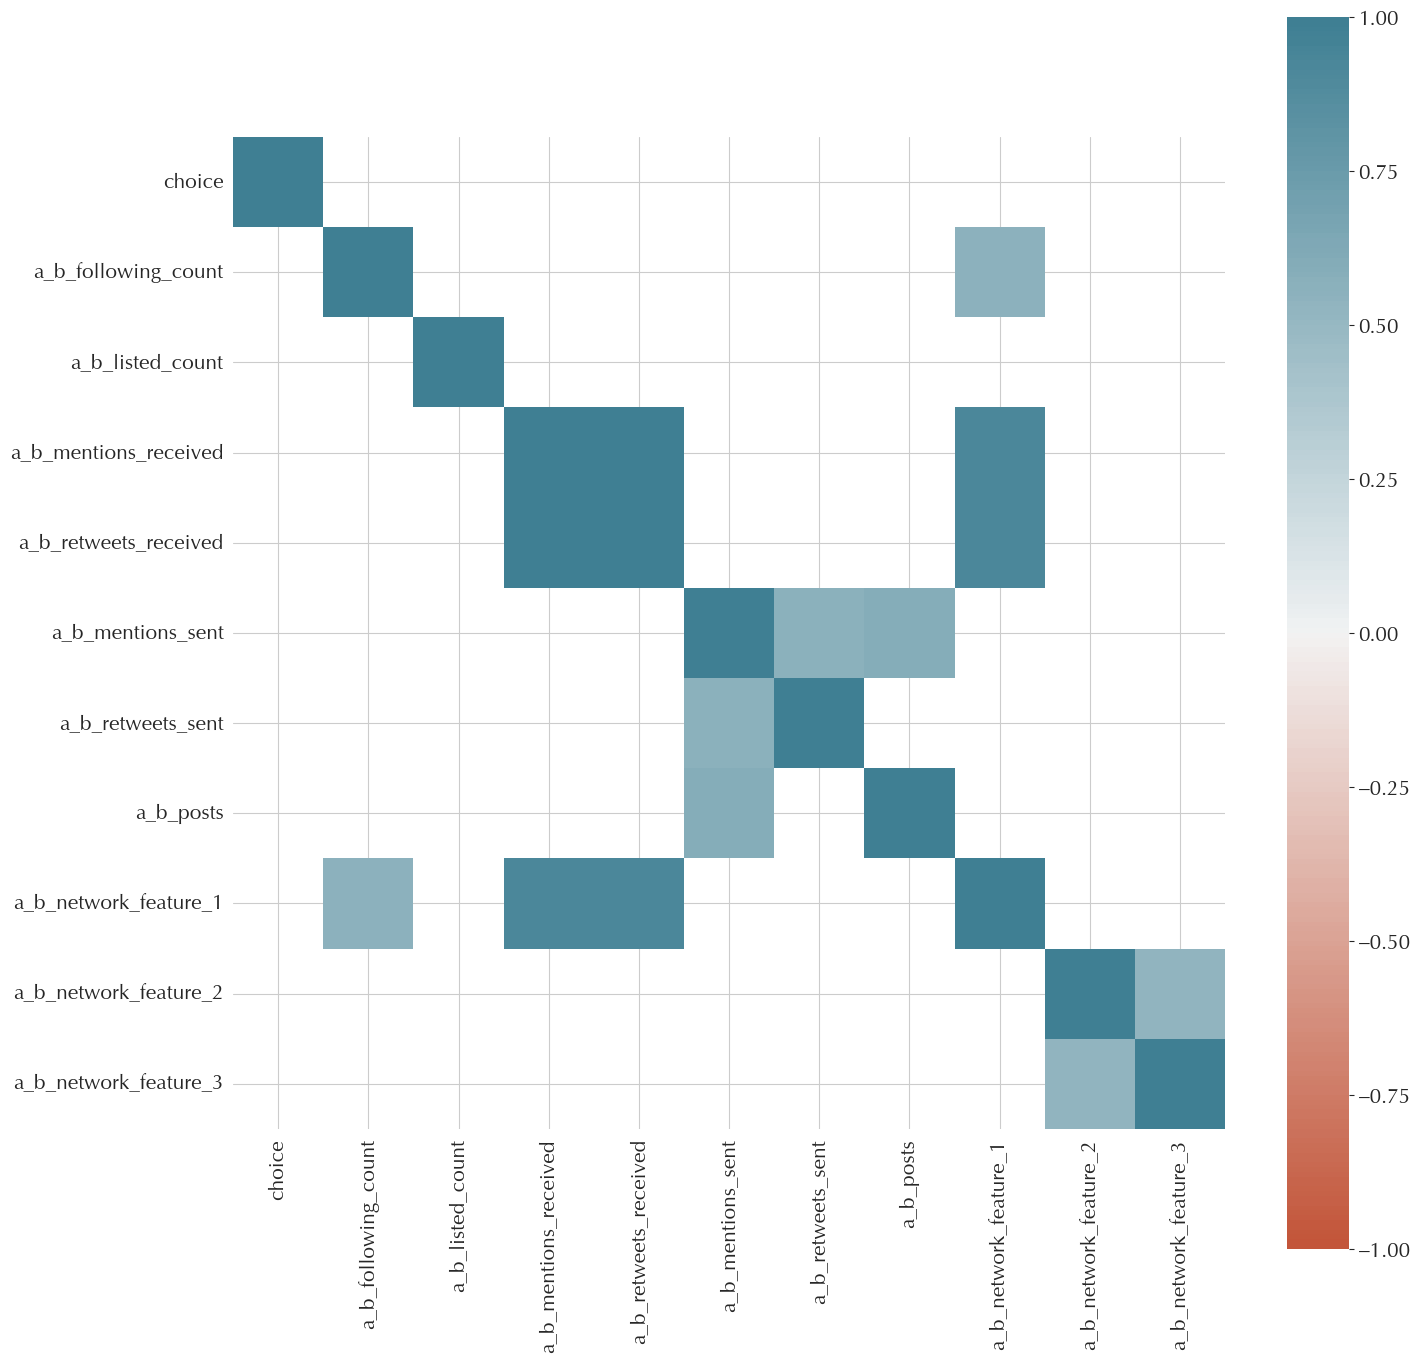

In [28]:
high_corr_minus = minus_corr[abs(minus_corr) > 0.5]
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    high_corr_minus,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [29]:
# Print the highly correlated pairs
high_corr_minus = high_corr_minus.unstack().sort_values()
high_corr_minus = high_corr_minus[high_corr_minus != 1]
high_corr_minus = high_corr_minus[abs(high_corr_minus) > 0.5]
print(high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_network_feature_3  a_b_network_feature_2    0.535223
a_b_following_count    a_b_network_feature_1    0.554175
a_b_network_feature_1  a_b_following_count      0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
a_b_retweets_sent      a_b_mentions_sent        0.568475
a_b_mentions_sent      a_b_posts                0.589821
a_b_posts              a_b_mentions_sent        0.589821
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_network_feature_1  a_b_mentions_received    0.914955
                       a_b_retweets_received    0.920833
a_b_retweets_received  a_b_network_feature_1    0.920833
a_b_mentions_received  a_b_retweets_received    0.988450
a_b_retweets_received  a_b_mentions_received    0.988450
dtype: float64


In [30]:
# Keep only unique pairs
unique_high_corr_minus = high_corr_minus[::2]
print(unique_high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_following_count    a_b_network_feature_1    0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
                       a_b_posts                0.589821
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_network_feature_1  a_b_retweets_received    0.920833
a_b_mentions_received  a_b_retweets_received    0.988450
dtype: float64


### VIF

In [31]:
vif_scores_minus = calculate_vif(minus_df)
print(vif_scores_minus)

                  feature        VIF
0                  choice   1.074270
1     a_b_following_count   1.600540
2        a_b_listed_count   1.041527
3   a_b_mentions_received  44.410092
4   a_b_retweets_received  47.312923
5       a_b_mentions_sent   2.018124
6       a_b_retweets_sent   1.525360
7               a_b_posts   1.597772
8   a_b_network_feature_1   8.641931
9   a_b_network_feature_2   1.455686
10  a_b_network_feature_3   1.411442


High VIF values suggest that the model's predictive power and interpretability could be compromised by multicollinearity. VIF scores for a_b_mentions_received, a_b_retweets_received and a_b_network_feature_1 indicate that these are highly linearly related to one or more of the other variables in the model. 

Decision to proceed with A - B since A / B had inf values due to 0 values. We will proceed by removing a_b_mentions_received and re-testing the VIF.

In [32]:
# Remove a_b_mentions_received
minus_df_test1 = minus_df.drop(columns=['a_b_mentions_received'])

# Recalculate VIF scores
vif_scores_minus_test1 = calculate_vif(minus_df_test1)

# Print VIF scores
print(vif_scores_minus_test1)

                 feature       VIF
0                 choice  1.073804
1    a_b_following_count  1.595763
2       a_b_listed_count  1.041418
3  a_b_retweets_received  7.222504
4      a_b_mentions_sent  2.008286
5      a_b_retweets_sent  1.525106
6              a_b_posts  1.586104
7  a_b_network_feature_1  8.543722
8  a_b_network_feature_2  1.455653
9  a_b_network_feature_3  1.411430


In [33]:
# Remove a_b_mentions_received
minus_df_test2 = minus_df.drop(columns=['a_b_mentions_received', 'a_b_network_feature_1'])

# Recalculate VIF scores
vif_scores_minus_test2 = calculate_vif(minus_df_test2)

# Print VIF scores
print(vif_scores_minus_test2)

                 feature       VIF
0                 choice  1.070764
1    a_b_following_count  1.305844
2       a_b_listed_count  1.040909
3  a_b_retweets_received  1.229562
4      a_b_mentions_sent  1.999874
5      a_b_retweets_sent  1.519861
6              a_b_posts  1.567444
7  a_b_network_feature_2  1.452702
8  a_b_network_feature_3  1.408850


Decision to drop 'a_b_mentions_received', 'a_b_network_feature_1'

In [34]:
minus_df.drop(columns=['a_b_mentions_received', 'a_b_network_feature_1'])
minus_df.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_retweets_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_1,a_b_network_feature_2,a_b_network_feature_3
0,0,-34235,0.001776,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,0.141615,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,0.490291,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,0.007194,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,14.591160,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


### Identifying Infinite Values

In [35]:
# Check for infinite values in the dataset
infinite_values = np.isinf(minus_df).any()
print("Columns with infinite values:", infinite_values[infinite_values].index.tolist())

Columns with infinite values: ['a_b_listed_count']


### Handling Infinite Values

In [36]:
# Replace infinite values with NaN
minus_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Then, you might want to impute these NaNs, for example, with the mean of the columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(minus_df)

# Print the first 5 rows of X_imputed
print(X_imputed[:5])

[[ 0.00000000e+00 -3.42350000e+04  1.77619893e-03 -1.48465182e+01
  -3.88352545e+00 -8.10382784e+00 -2.31919685e-01 -6.62666489e+00
  -6.40000000e+01  9.09696970e+01  9.43810606e+03]
 [ 0.00000000e+00 -1.76710000e+04  1.41614907e-01  4.99614851e+01
   1.68546848e+01  2.48165175e+00  5.46816093e-01  4.10629932e+00
   2.06000000e+02 -1.13587704e+02 -1.60114929e+03]
 [ 0.00000000e+00  3.68800000e+03  4.90291262e-01  2.47689489e+01
   9.20196854e+00  4.75831697e+00  4.90702248e-01  2.98651610e+00
   9.20000000e+01  5.85945017e+01  5.72256357e+03]
 [ 0.00000000e+00 -1.95420000e+04  7.19424460e-03 -5.65184032e+02
  -3.90016375e+02 -2.62205324e+01 -7.06705339e+00 -2.92712794e+01
  -1.75600000e+03 -2.14692958e+01 -1.29967897e+03]
 [ 1.00000000e+00  3.80350000e+04  1.45911602e+01  1.27252413e+02
   3.34172227e+01  2.11171109e+01  2.21376511e+00  1.92980354e+01
   4.66000000e+02  7.89042934e+01  8.40220036e+02]]


### Converting the NumPy array back into a pandas DataFrame

In [37]:
# Convert the imputed NumPy array back into a pandas DataFrame
minus_df_imputed = pd.DataFrame(X_imputed, columns=minus_df.columns)

# Print the first 5 rows of the newly created DataFrame
print(minus_df_imputed.head())

   choice  a_b_following_count  a_b_listed_count  a_b_mentions_received  \
0     0.0             -34235.0          0.001776             -14.846518   
1     0.0             -17671.0          0.141615              49.961485   
2     0.0               3688.0          0.490291              24.768949   
3     0.0             -19542.0          0.007194            -565.184032   
4     1.0              38035.0         14.591160             127.252413   

   a_b_retweets_received  a_b_mentions_sent  a_b_retweets_sent  a_b_posts  \
0              -3.883525          -8.103828          -0.231920  -6.626665   
1              16.854685           2.481652           0.546816   4.106299   
2               9.201969           4.758317           0.490702   2.986516   
3            -390.016375         -26.220532          -7.067053 -29.271279   
4              33.417223          21.117111           2.213765  19.298035   

   a_b_network_feature_1  a_b_network_feature_2  a_b_network_feature_3  
0            

In [38]:
y = np.asarray(minus_df_imputed['choice'])
X = minus_df_imputed.drop(['choice'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split

# First split: Separate out a test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)

### Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


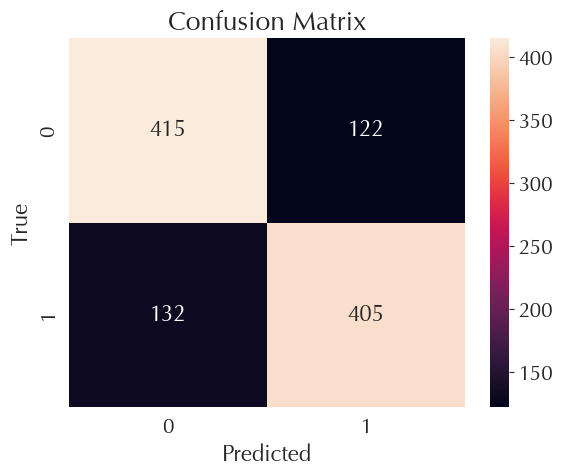

Accuracy: 76.4%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       537
         1.0       0.77      0.75      0.76       537

    accuracy                           0.76      1074
   macro avg       0.76      0.76      0.76      1074
weighted avg       0.76      0.76      0.76      1074



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)

sns.heatmap(conf_matrix_lr, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"Accuracy: {accuracy_lr*100:.1f}%")
print("Classification Report:")
print(class_report_lr)

#### Feature Importance

In [42]:
# Assuming 'minus_df' is your original DataFrame and 'choice' is your target variable
feature_names = minus_df.drop(['choice'], axis=1).columns.tolist()

# Assuming you already have the logistic regression model fitted as 'lr'
coefficients = lr.coef_[0]

# Mapping coefficients to feature names
feature_importance = pd.Series(coefficients, index=feature_names)

# Sorting the features by their absolute values in descending order
sorted_features = feature_importance.abs().sort_values(ascending=False)

# Print the sorted features
print("Features in descending order of importance:")
print(sorted_features)

Features in descending order of importance:
a_b_listed_count         3.475094
a_b_following_count      0.620816
a_b_network_feature_1    0.401571
a_b_retweets_sent        0.389200
a_b_mentions_received    0.353272
a_b_network_feature_2    0.220766
a_b_retweets_received    0.169922
a_b_mentions_sent        0.125205
a_b_network_feature_3    0.116056
a_b_posts                0.020634
dtype: float64


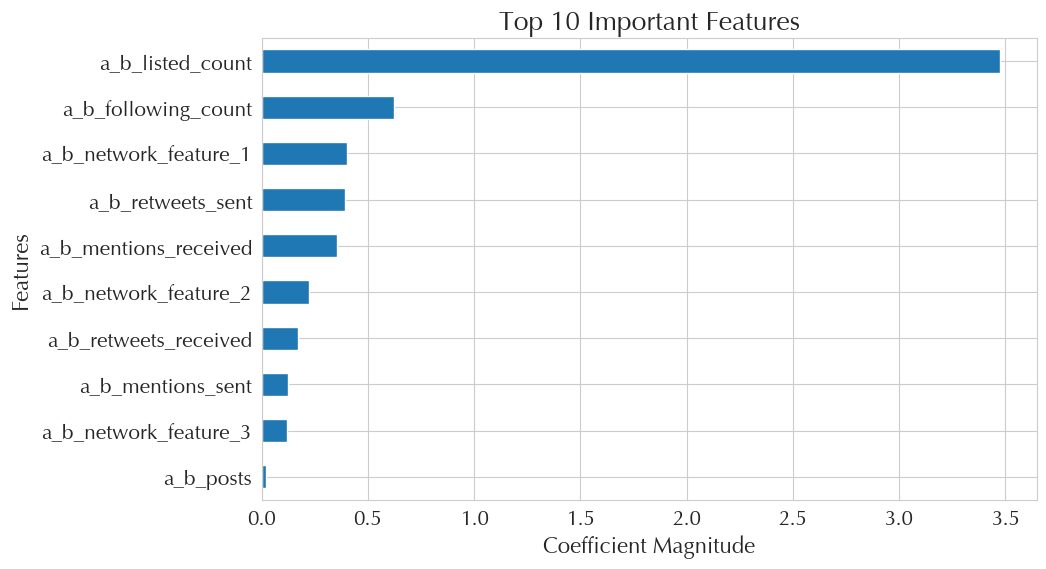

In [43]:
# Sorting the features by their absolute values in ascending order for the purpose of the horizontal bar plot
# This ensures the most important features are at the top of the plot
sorted_features_for_plotting = sorted_features.head(10).sort_values(ascending=True)

# Plotting the most important features
plt.figure(figsize=(10, 6))
sorted_features_for_plotting.plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

### K-NN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


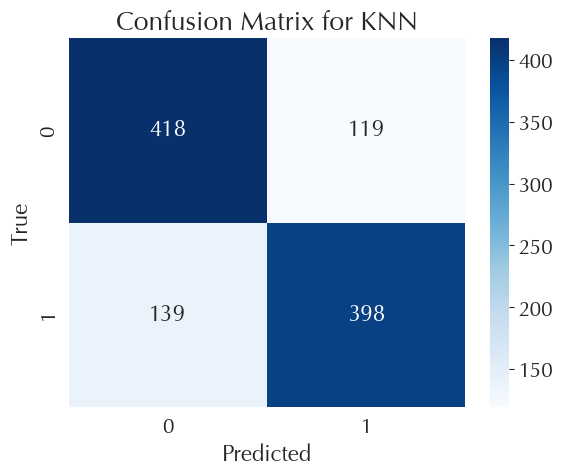

Accuracy: 76.0%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       537
         1.0       0.77      0.74      0.76       537

    accuracy                           0.76      1074
   macro avg       0.76      0.76      0.76      1074
weighted avg       0.76      0.76      0.76      1074



In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model. You can adjust 'n_neighbors' as needed.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

# Make sure to use the scaled version of X_test here
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)
class_report_knn = classification_report(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing accuracy and classification report
print(f"Accuracy: {accuracy_knn*100:.1f}%")
print("Classification Report:")
print(class_report_knn)

### Random Forest

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


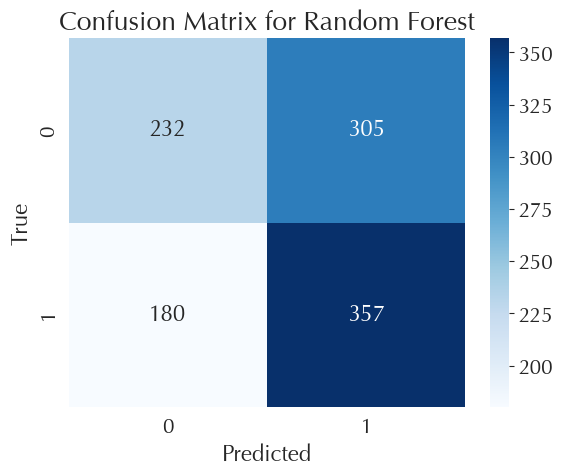

Accuracy: 54.8%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49       537
         1.0       0.54      0.66      0.60       537

    accuracy                           0.55      1074
   macro avg       0.55      0.55      0.54      1074
weighted avg       0.55      0.55      0.54      1074



In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model. You can adjust parameters as needed, like 'n_estimators'.
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Make sure to use the scaled version of X_test here. Correcting the oversight in your previous KNN example.
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing accuracy and classification report
print(f"Accuracy: {accuracy_rf*100:.1f}%")
print("Classification Report:")
print(class_report_rf)

### Gradient Boosting

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


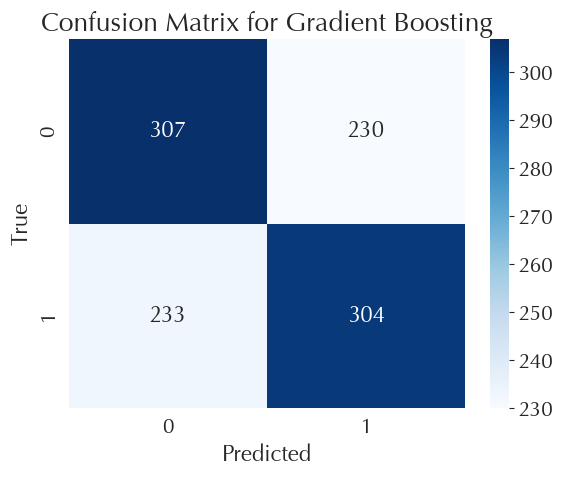

Accuracy: 56.9%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57       537
         1.0       0.57      0.57      0.57       537

    accuracy                           0.57      1074
   macro avg       0.57      0.57      0.57      1074
weighted avg       0.57      0.57      0.57      1074



In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gb.fit(X_train_scaled, y_train)

# Make predictions on the test set using the scaled version
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing accuracy and classification report
print(f"Accuracy: {accuracy*100:.1f}%")
print("Classification Report:")
print(class_report)

### Calculate the financial value

In [47]:
FinancialImpact = df.copy()

In [48]:
# Constants
profit_per_unit = 10
cost_per_tweet_without_analytics = 5
purchase_prob_single_tweet = 0.0002
purchase_prob_double_tweet = 0.0003
cost_per_tweet_with_analytics = 10  # Cost for two tweets when model is used
model_accuracy = accuracy_lr

In [49]:
# Calculate the number of influencers and their average followers
influencer = FinancialImpact.shape[0]
noninfluencer = FinancialImpact.shape[0]

In [50]:
influencer

5368

In [51]:
noninfluencer

5368

In [52]:
# Calculate the average number of followers for influencers and non-influencers

influencer_followers = (FinancialImpact.loc[FinancialImpact['Choice'] == 1, 'A_follower_count'].sum() +\
                FinancialImpact.loc[FinancialImpact['Choice'] == 0, 'B_follower_count'].sum())

noninfluencer_followers = (FinancialImpact.loc[FinancialImpact['Choice'] == 0, 'A_follower_count'].sum() +\
                FinancialImpact.loc[FinancialImpact['Choice'] == 1, 'B_follower_count'].sum())

In [53]:
influencer_followers

5242950991

In [54]:
noninfluencer_followers

1952708766

#### Without model

In [55]:
# Calculate the cost, revenue, and profit with the model
Cost_without_model = cost_per_tweet_without_analytics * (influencer + noninfluencer)

# Since non-influencers do not lead to sales, the revenue is only from influencers
Revenue_without_model = profit_per_unit * purchase_prob_single_tweet * influencer_followers

Profit_without_model = Revenue_without_model - Cost_without_model
print("Total Cost without model: $", Cost_without_model)
print("Total Revenue without model: $", Revenue_without_model)
print("Total Profit without model: $", Profit_without_model)

Total Cost without model: $ 53680
Total Revenue without model: $ 10485901.982
Total Profit without model: $ 10432221.982


#### With model

Since our model does not have 100% accuracy, we need to take model accuracy and recall into consideration when calculating financial impact.

In [56]:
# Calculate the cost, revenue, and profit with the model

# The cost will not be impacted by the model accuracy as we do not know which one is a false positive
Cost_with_model = cost_per_tweet_with_analytics * (influencer) 

# Since non-influencers and false positives do not lead to sales, the revenue is only from recall of influencers
Revenue_with_model = recall_lr * profit_per_unit * purchase_prob_double_tweet * influencer_followers

Profit_with_model = Revenue_with_model - Cost_with_model
print("Total Cost with model: $", Cost_with_model)
print("Total Revenue with model: $", Revenue_with_model)
print("Total Profit with model: $", Profit_with_model)

Total Cost with model: $ 53680
Total Revenue with model: $ 11862542.745000001
Total Profit with model: $ 11808862.745000001


#### Boost in profit with model

In [57]:
Profit_boost = Profit_with_model - Profit_without_model
print("Profit Boost: $", Profit_boost)

Profit Boost: $ 1376640.7630000003


#### Perfect Model

In [61]:
# Calculate the cost, revenue, and profit with the model

# The cost will not be impacted by the model accuracy as we do not know which one is a false positive
Cost_withperfect_model = cost_per_tweet_with_analytics * (influencer) 

# Since non-influencers and false positives do not lead to sales, the revenue is only from recall of influencers
Revenue_withperfect_model = profit_per_unit * purchase_prob_double_tweet * influencer_followers

Profit_withperfect_model = Revenue_withperfect_model - Cost_withperfect_model
print("Total Cost with perfect model: $", Cost_withperfect_model)
print("Total Revenue with perfect model: $", Revenue_withperfect_model)
print("Total Profit with perfect model: $", Profit_withperfect_model)

Total Cost with perfect model: $ 53680
Total Revenue with perfect model: $ 15728852.972999997
Total Profit with perfect model: $ 15675172.972999997


In [63]:
Profit_perfectboost = Profit_withperfect_model - Profit_without_model
print("Profit Boost: $", Profit_perfectboost)

Profit Boost: $ 5242950.990999997


### Adjusting the per-row profit calculation based on the overall performance metrics (TP, FP, TN, FN) of your model
1. Adjust Revenue by Recall (TPR): Recall (True Positive Rate) measures the model's ability to correctly identify all relevant instances. A higher recall means fewer missed opportunities (FNs). Adjusting revenue by recall accounts for the model's effectiveness in capturing all potential influencer-driven sales.
2. Adjust Cost by Precision: Precision measures the model's accuracy in identifying true influencers. Lower precision means higher costs from FPs (paying non-influencers who won't drive sales). Adjusting the cost by precision reflects the financial impact of incorrect positive predictions.

In [58]:
# Model performance metrics
TP = conf_matrix_lr[1, 1]  # True Positives
FP = conf_matrix_lr[0, 1]  # False Positives
TN = conf_matrix_lr[0, 0]  # True Negatives
FN = conf_matrix_lr[1, 0]  # False Negatives

# Calculating precision and recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Modify the function to include adjustments based on precision and recall
def calculate_profit_with_model_adjusted(row):
    if row['Choice'] == 1:  # If A is more influential according to the model
        influencer_followers = row['A_follower_count']
    else:  # If B is more influential according to the model
        influencer_followers = row['B_follower_count']
    
    # Calculating expected sales adjusted by recall
    expected_sales = influencer_followers * purchase_prob_double_tweet * recall
    
    # Adjusting the cost by precision (to account for FP costs)
    adjusted_cost = cost_per_tweet_with_analytics * precision
    
    # Calculating adjusted profit
    profit = expected_sales * profit_per_unit - adjusted_cost
    return profit

# Apply the modified function row-wise
FinancialImpact['profit_with_model_adjusted'] = FinancialImpact.apply(calculate_profit_with_model_adjusted, axis=1)

# Print the first 5 rows of the updated DataFrame
print(FinancialImpact.head())

   Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1  A_network_feature_2  A_network_feature_3  \
0   0.362150                    2    

In [59]:
# Print the total profit with the adjusted model
profit_with_model_adjusted = FinancialImpact['profit_with_model_adjusted'].sum()
print(f"Total profit with model adjusted: ${profit_with_model_adjusted:.2f}")

Total profit with model adjusted: $11821289.61


In [60]:
net_boost_in_profit_adjusted = profit_with_model_adjusted - profit_without_model
print(f"Net boost in profit adjusted: ${net_boost_in_profit:.2f}")

NameError: name 'profit_without_model' is not defined